## Blending images

basic concept -> black = 0 (False), so that:
1. black + anycolor= anycolor
2. black AND anycolor = black

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../DATA/bricks.jpg')
logo = cv2.imread('../DATA/watermark_no_copy.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

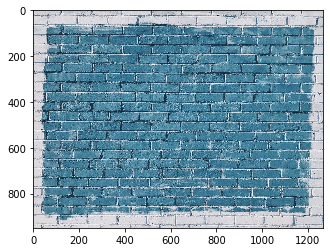

In [3]:
plt.imshow(img)

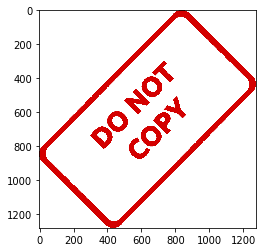

In [4]:
plt.imshow(logo)

In [5]:
img.shape

(950, 1267, 3)

In [6]:
logo.shape

(1280, 1277, 3)

**Resize logo, create ROI in image where logo will be placed**

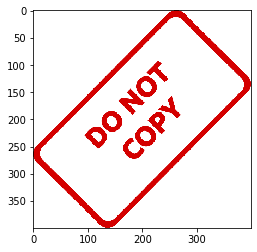

In [7]:
logo = cv2.resize(logo, (400,400))
plt.imshow(logo)

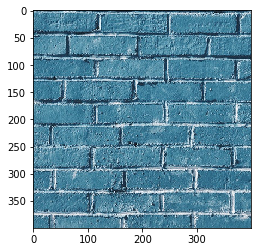

In [8]:
roi = img[400:800,400:800]
plt.imshow(roi)

In [9]:
roi.shape

(400, 400, 3)

**MASKS**

Gray logo

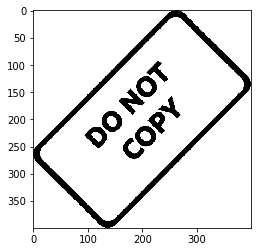

In [10]:
logo_grey = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
plt.imshow(logo_grey, cmap = 'gray')

Mask

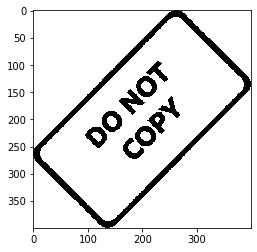

In [11]:
ret_value, mask = cv2.threshold(logo_grey, 170, 255, cv2.THRESH_BINARY)
ret_value, mask_inv = cv2.threshold(logo_grey, 170, 255, cv2.THRESH_BINARY_INV)
plt.imshow(mask, cmap='gray')

Inverse mask

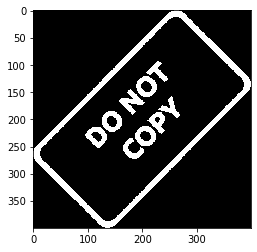

In [12]:
plt.imshow(mask_inv, cmap='gray')

**Creating background and foreground**

1. Background = image with logo shape in black (so we can add logo later)
2. Foreground = logo shape in original color, rest in black (so it won't overlap original image)

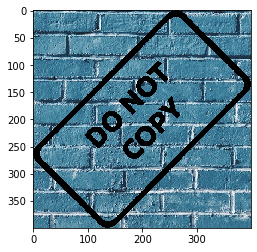

In [13]:
background = cv2.bitwise_and(roi, roi, mask = mask)
plt.imshow(background)

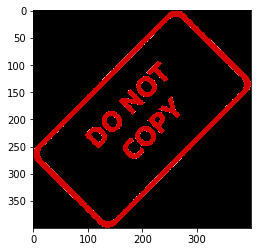

In [14]:
foreground = cv2.bitwise_and(logo, logo, mask = mask_inv)
plt.imshow(foreground)

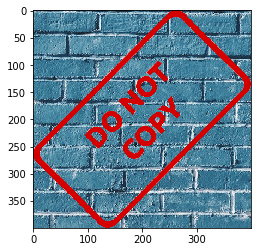

In [19]:
result_roi = cv2.add(background, foreground)
plt.imshow(result_roi)

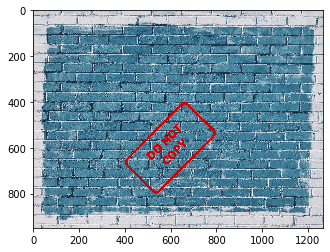

In [20]:
img[400:800,400:800] = result_roi
plt.imshow(img)